# 資料匯入

In [74]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
X = df.drop('屬種',axis=1)
y = df['屬種']

In [76]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: Yellow' if v else '' for v in is_high]

In [77]:
X.corr().round(3).style.apply(highlight_highcorr)

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1,-0.109,0.872,0.818
花萼寬度,-0.109,1,-0.421,-0.357
花瓣長度,0.872,-0.421,1,0.963
花瓣寬度,0.818,-0.357,0.963,1


In [78]:
# PCA (n=4)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
X

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [79]:
# 解釋共變異數比率
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [80]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

In [81]:
p_accu = accumulate(pca.explained_variance_ratio_)
p_accu

[0.9246162071742684, 0.9776317750248034, 0.9948169145498101, 1.0]

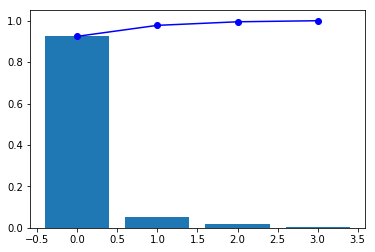

In [82]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'b-o')

plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder
# 把類別轉成0,1,2，散佈圖上色用
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_label = le.transform(y)

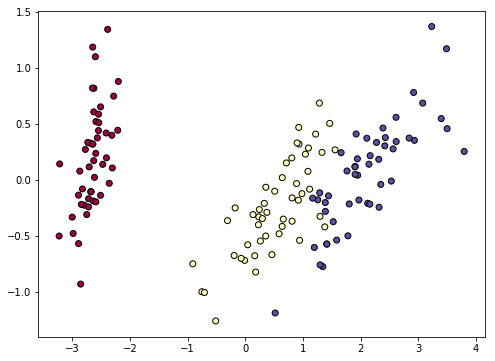

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_label, cmap=plt.cm.get_cmap("Spectral"), edgecolor='k')
plt.show()

In [85]:
# PCA (n=2) - 將4個特徵值轉降成2個
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [86]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [87]:
pd.DataFrame(X).corr()

,0,1
0,1.000000e+00,1.159304e-15
1,1.159304e-15,1.000000e+00


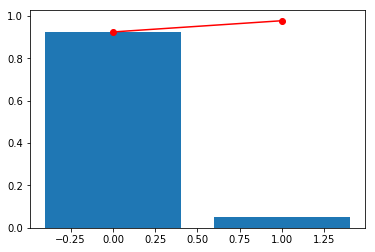

In [88]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_label = le.transform(y)

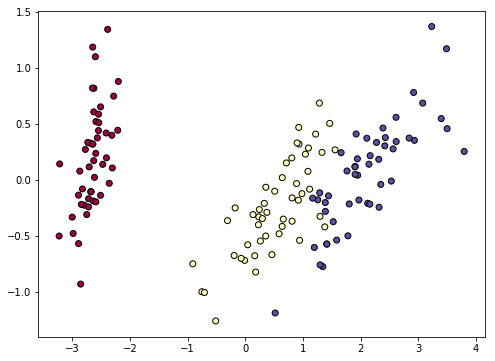

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_label, cmap=plt.cm.get_cmap("Spectral"), edgecolor='k')
plt.show()

# SVM

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [93]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
from sklearn import metrics
print(metrics.classification_report(y_test, classifier.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, classifier.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        16

    avg / total       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]
